# Test

# Heat equation in 1D

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x ^2}$$

# Finite differences:

## Forward difference: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$
## Central difference: $f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$
## Backward difference: $f'(x) \approx \frac{f(x)-f(x-h)}{h}$

In [1]:
from typing import Callable
def first_order_finite_diff(diff_type: str, x: float, h: float, my_func: Callable):
    SHIFTS = {'forward': (0., 1.),
             'central': (-1., 1.),
             'backward': (-1., 0)}
    diff_lower = diff_type.lower()
    assert diff_lower in SHIFTS, f"The provided diff_type='{diff_type}' not in {SHIFTS}"
    assert h > 0, f"The provided h={h} <= 0."
    
    x_low, x_high = (x+h*shift for shift in SHIFTS[diff_lower])
    
    return (my_func(x_high)-my_func(x_low))/(x_high-x_low)
    
first_order_finite_diff("forward", 0, 1, lambda x: x*x+5)

1.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

my_func = lambda x : np.square(x)+5
x0 = 1.0
h = 1.0

x = np.linspace(x0-1.2*h, x0+1.2*h, num=50)
f = my_func(x)

types = {"forward": (0., 1.), "central": (-1., 1.), "backward": (-1., 0.)}
slopes = {key:first_order_finite_diff(key, x0, h, my_func) for key in types.keys()}

data = [("f(x)", x, f),]
for name, shifts in types.items():
    x_values = np.array([x0+shifts[0]*h, x0+shifts[1]*h])
    y_values = my_func(x0)+slopes[name]*(x_values-x0)
    data.append((name, x_values, y_values))

<bound method Axes.plot of <Axes: >>

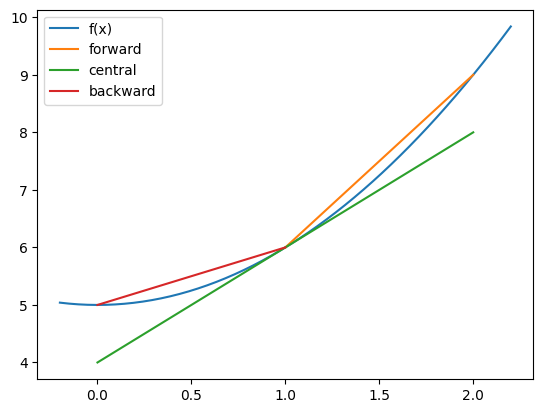

In [3]:
fig, ax = plt.subplots()
for label, x, y in data:
    ax.plot(x, y, label=label)
    
ax.legend()
ax.plot

Similarly for second order differnces:
* Forward: $f''(x) \approx \frac{\frac{f(x+2h)-f(x+h)}{h}-\frac{f(x+h)-f(x)}{h}}{h} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$
* Central: $f''(x) \approx \frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h} = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$
* Backward: $f''(x) \approx \frac{\frac{f(x)-f(x-h)}{h}-\frac{f(x-h)-f(x-2h)}{h}}{h} = \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}$

# Simple example:
## The heat equation:
* Diff eq.: $\frac{\partial U}{\partial t} = \frac{\partial ^2 U }{\partial x^2}$ or: $U_t=U_{xx}$
* Boundary condition: $U(0,t) = U(1,t)=0$
* Initial condition: $U(x,0) = U_0(x)$

In [29]:
import numpy as np
from matplotlib import cm
# %matplotlib notebook

def heat_simple_solution(x, t):
    return 10.*np.exp(-1.0*np.sqrt(np.pi)*t)*np.sin(np.pi * x)

def plot_2d(x_min_max_Nstep, y_min_max_Nstep, analytic_func=None, grid_values=None,
            labels={'x':'x', 'y':'y', 'z':'Value'}, z_lim=None):
    assert (analytic_func is not None or grid_values is not None), "Analytical function or grid_values needed as imput"
    for needed_label in ['x', 'y', 'z']:
        assert needed_label in labels, f"The {needed_label} is missing from {labels}"
    if grid_values is not None:
        exp_grid_shape = (y_min_max_Nstep[2], x_min_max_Nstep[2], )
        assert grid_values.shape == exp_grid_shape,\
                f"Incorrect Grid shape: expected: {exp_grid_shape}, actual: {grid_values.shape}"
    
    xs = np.linspace(*x_min_max_Nstep)
    ys = np.linspace(*y_min_max_Nstep)
    grid_x, grid_y = np.meshgrid(xs, ys)
    fug, ax = plt.subplots(subplot_kw={'projection': '3d'})
    if analytic_func is not None:
        values = analytic_func(grid_x, grid_y)
        ax.plot_surface(grid_x, grid_y, values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    if grid_values is not None:
        ax.plot_surface(grid_x, grid_y, grid_values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    ax.set_xlabel(labels['x'], fontweight='bold')
    ax.set_ylabel(labels['y'], fontweight='bold')
    ax.set_zlabel(labels['z'], fontweight='bold')
    if z_lim is not None:
        ax.set_zlim(*z_lim)

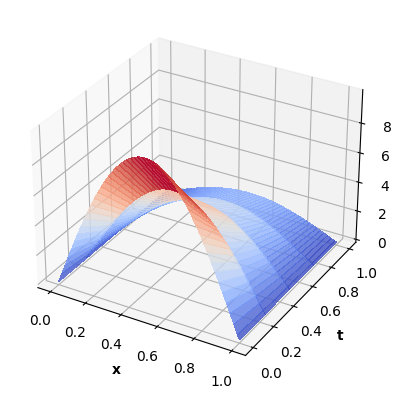

In [20]:
plot_2d((0., 1., 100), (0., 1., 5), heat_simple_solution, labels={'x':'x', 'y':'t', 'z':'Values'})

# TODO:
* Given: Initial condition $U(x, 0)$ 
* TODO: Method for $U(x, t) \rightarrow U(x, t+\Delta t)$

## Create a grid as follows:
* Grid points: $u(x_j, t_n)$ or $u_{j,n}$ in short
* Grid partiion:
  * space: $x_0$=0, $x_1$, ... $x_J=1$, and $h := x_{i+1}-x_i = 1/J$
  * time: $t_0$=0, $t_1$, ... $t_N=T$, and $k := t_{i+1}-t_i = T/N$

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.87785252e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.51056516e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.51056516e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


<IPython.core.display.Javascript object>


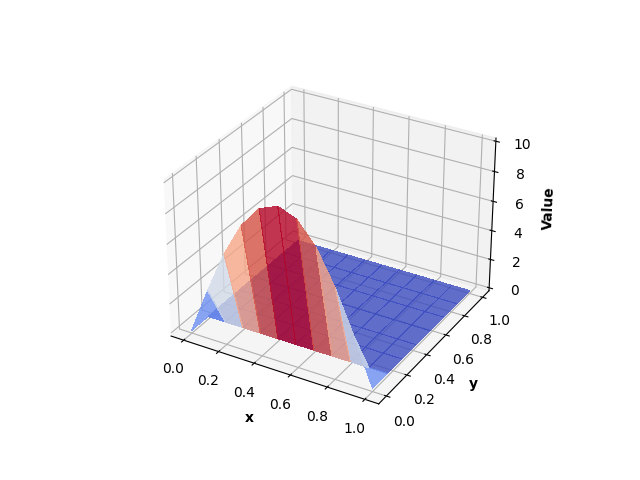

In [45]:
def get_my_heat_grid(J=20, N=20, T_max=1., initial_cond = lambda x: heat_simple_solution(x, 0)):
    h = 1./(J-1)
    k = T_max/(N-1)
    
    grid = np.zeros(shape=(J, N), dtype=float)
    grid[:,0] = heat_simple_solution(np.linspace(0.,1.,J), 0)
    
    return {"grid": grid, "h": h, "k": k}

x_step = 11
t_step = 8
my_grid = get_my_heat_grid(x_step,t_step)["grid"]
print(my_grid)

plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=my_grid.T)

# Explicit method:
* **Forward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\frac{u_{j, n+1}-u_{j, n}}{k} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{h^2}$$

$$u_{j, n+1} = \left(1-2r\right) u_{j,n} + r(u_{j+1, n}+u_{j-1, n})$$

Where: $r = k/h^2$

* Numerically stable, when $k/h^2\leq 1/2$
* Error: $\Delta u = O(k)+O(h^2)$

0.4900745037251862
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.17279335e-01 3.17122769e-01 3.16966281e-01 ... 1.64005205e-05
  1.63924274e-05 1.63843384e-05]
 [6.34239197e-01 6.33926223e-01 6.33613403e-01 ... 3.27845271e-05
  3.27683491e-05 3.27521791e-05]
 ...
 [6.34239197e-01 6.33926223e-01 6.33613403e-01 ... 3.27845271e-05
  3.27683491e-05 3.27521791e-05]
 [3.17279335e-01 3.17122769e-01 3.16966281e-01 ... 1.64005205e-05
  1.63924274e-05 1.63843384e-05]
 [1.22464680e-15 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


<IPython.core.display.Javascript object>


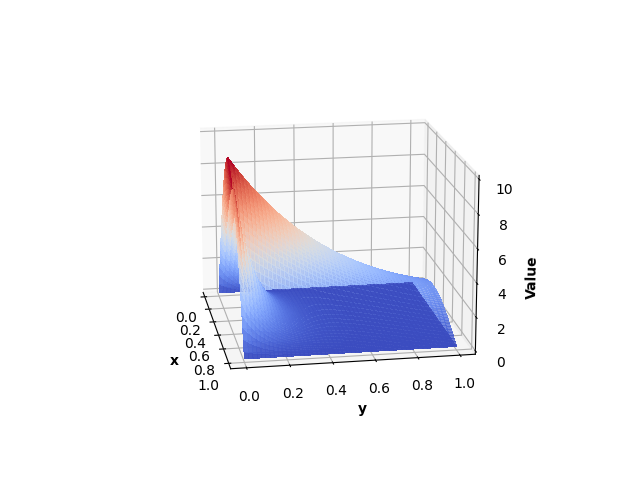

In [46]:

x_step = 100
t_step = 2*x_step**2

explicit = get_my_heat_grid(x_step, t_step)
explicit_grid = explicit["grid"]
explicit_h = explicit["h"]
explicit_k = explicit["k"]

explicit_r = explicit_k/explicit_h**2.0
print(explicit_r)
for t_n in range(1,explicit_grid.shape[1]):
    for x_j in range(1,explicit_grid.shape[0]-1):
        explicit_grid[x_j,t_n] = (1.-2.*explicit_r)*explicit_grid[x_j,t_n-1] + explicit_r * (
            explicit_grid[x_j+1,t_n-1]+explicit_grid[x_j-1,t_n-1])
print(explicit_grid)

%matplotlib notebook
plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution, grid_values=explicit_grid.T, z_lim=(0,10.))
# plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution)

# Implicit method:
* **Backward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\frac{u_{j, n}-u_{j, n-1}}{k} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{h^2}$$

$$\left(1+2r\right) u_{j,n} - r(u_{j+1, n}-u_{j-1, n}) = u_{j, n-1} $$

* Alway stable
* Numerically more intensive than explicit method. (Due to solving a system of linear equations for a timestep)
* Error: $\Delta u = O(k)+O(h^2)$

# Crank-Nicolson method:
* Combine explicit and implicit method:
1. Take  explicit at $u(x_j, t_n)$:
$$\frac{u_{j, n+1}-u_{j, n}}{k} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{h^2}$$
1. Take implicit at $u(x_j, t_{n+1})$:
$$\frac{u_{j, n+1}-u_{j, n}}{k} = \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{h^2}$$
1. Average them:
$$\frac{u_{j, n+1}-u_{j, n}}{k} = \frac{1}{2}\left(\frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{h^2}+ \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{h^2}\right)$$

$$\left(2+2r\right) u_{j,n+1} - r(u_{j+1, n+1}-u_{j-1, n+1}) = (2-2r)u_{j,n}+ru_{j-1, n}+ru_{j+1, n} $$

* Alway stable
* Numerically more intensive than explicit method. (Due to solving a system of linear equations for a timestep)
* Error: $\Delta u = O(k^2)+O(h^2)$ <u>Quadratic in time</u> as well.